# Chapter 3. Visualizing Data

1. explore Data by yourself

2. communicate Data

afterwards,

1. savefig 
or 
2. show()

In [ ]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# line plot

In [ ]:
# default create line chart
plt.plot(years, gdp, color = 'green', marker = 'o', linestyle = 'solid')

# add a title
plt.title('Normal GDP')

# add a label to the y-axis
plt.ylabel('billions of $')
plt.show()

# save the img in the now dir
plt.savefig('normalgdp.jpeg')

# Bar Chart

 1. category 별 수치 비교에 좋음 
 2. numeric variable의 frequency dist를 bean별로 보여주는데에도 좋음

In [ ]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [ ]:
plt.bar(range(len(movies)), num_oscars, color = 'green')

plt.title('My Favorite Movies')
plt.ylabel('# of Academy Awards')

plt.xticks(range(len(movies)), movies)

plt.show()

In [ ]:
semi_cond_growth = [21, 10, 12, 3]
country = ['Korea', 'China', 'U.S', 'Jaan']

plt.bar(range(len(country)), semi_cond_growth, color = 'purple')
plt.ylabel('Growth 2018-2019')
plt.xticks(range(len(country)), country)
plt.yticks([0, 10, 20], [0, '10bil', '20bil'])

# save the image
fig = plt.gcf()
plt.show()
fig.savefig('/Users/sucky/Desktop/growth_rate.jpg', format ='png')

In [ ]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

In [ ]:
histogram = Counter(min(grade //10 * 10, 90) for grade in grades)

In [ ]:
histogram.

In [ ]:
histogram.keys()
histogram.values()

In [ ]:
plt.bar([x + 5 for x in histogram.keys()], histogram.values(), 10, edgecolor = [0,0,0], color = 'green')
plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)])

plt.xlabel('Decile')
plt.ylabel('# of Students')

plt.title('Distribution of Exam_1 Grades')
fig = plt.gcf()
fig.savefig('/Users/sucky/Desktop/exam_1_grades.jpg', format = 'jpg')

plt.show()

# Distribution

In [ ]:
scores = [1,2,3,1,4,3,4,5,4,3,4,5,6,7,8,6,8,9,8]

dictionary = Counter(scores)

In [ ]:
distribution = [(x,y) for x,y in dictionary.items()]

distribution

In [ ]:
score, freq = zip(*distribution)

In [ ]:
score = list(score)

In [ ]:
freq = list(freq)

In [ ]:
plt.bar(score, freq, 1, edgecolor = [0,0,0], color = 'purple')
plt.axis([0,10,0,5]) # Set Y axis to 0 to not be considered misleading
plt.xticks(range(1,11),range(1,11))
plt.yticks(range(0,6), range(0,6))

plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.title('Score Distribution')
fig = plt.gcf()
fig.savefig('/Users/sucky/Desktop/class_1_dist.pdf', format = 'pdf')

plt.show()

In [ ]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel('# of times I heard someone say "data science"')
plt.ticklabel_format(useOffset = False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title('No so huge anymore')
plt.show()


# 7/11. Today's Review : $*args$ and $**kwargs$

In [ ]:
def doubler(f):
    def g(x):
        return 2*f(x)
    return g

In [ ]:
def f1(x):
    return x+1

g = doubler(f1)

assert g(3) == 8

In [ ]:
# doubler에 인풋을 두개 받는 함수를 넣으면 작동하지 않는다.

In [ ]:
def f2(x, y):
    return x + y


#g = doubler(f2)
#try:
#    g(1,2)
#except TypeError:
#    print("as defined, g only takes one argument")

In [ ]:
# arbitrary arguments

def magic(*args, **kwargs): # arbitrary args as tuple 
    print('unnamed args:', args)
    print('keyword args:', kwargs)

magic(1,2, key ='word', key2='word2')

In [ ]:
def other_way_magic(x,y,z,c):
    return x + y + z + c

x_y_list = [1,2]
z_dict = {'z': 3, 'c': 5}

other_way_magic(*x_y_list, **z_dict)

### function input sequence : 1). positional 2). optional 3). args : unnamed 4). kwargs : named

In [ ]:
def printer(n ,main_statement, additional_statement = 'Hi', *args, **kwargs):
    if n >= 3:
        additional_statment = 'hey sucker.'
    
    print((additional_statement + '\n' + main_statement + '\n' +
         'It is so good to see' + ' {}'+', {} '*(len(args)-1) + 'thru this wedding').format(*args))

In [ ]:
printer(4, 'Sarah and I are getting married.','Welcome', 'sam', 'james')

In [ ]:
def doubler_correct(f):
    def g(*args, **kwargs):
        """whatever g is supplied, give it without exception to f"""
        return 2 * f(*args, **kwargs)
    
    return g

g = doubler_correct(f2)

assert g(1 ,2) == 6

In [ ]:
# 변수 이름을 명시하는 게 더 바람직하다, 하지만 어쩔 수 없을 때는 받는다.

In [ ]:
def dictionary_printer(**kwargs):
    my_dict = kwargs
    indexes = my_dict.values()
    print([i for i in indexes])

In [ ]:
dictionary_printer(seokhee='korea', mh='american')

## 2019/7/11 : Data Visualization

# line plot : Time serial trend
# Bar Plot : Distribution, Comparison
# Scatter Plot : Correlation

# < Line Chart >

In [ ]:
from matplotlib import pyplot as plt

variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x+y for x,y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance,'g-', label = 'variance')
plt.plot(xs, bias_squared, 'r-.', label = 'bias^2')
plt.plot(xs, total_error, 'b:', label= 'total error')

plt.legend(loc=9)
plt.xlabel('mod                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               el complexity')
plt.xticks([])
plt.title('the Bias-Variance TradeOff')
plt.show()


# Scatter Plot : 다변량 위치 및 상관관계

In [2]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [3]:
from matplotlib import pyplot as plt

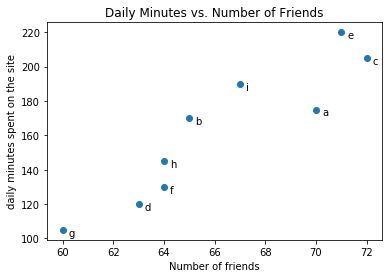

In [30]:
# label each point
plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate( label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(6,-6), # coordinate in 'pt'
        textcoords='offset points' ) # unit of the text coordinate : pt(as in word)

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("Number of friends")
plt.ylabel("daily minutes spent on the site")

plt.show()

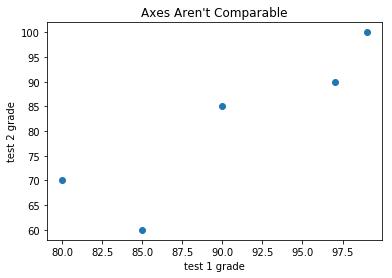

In [24]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

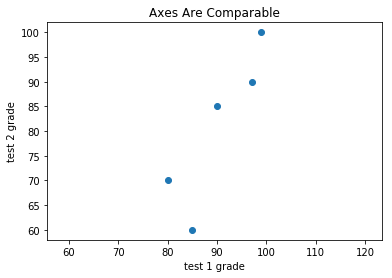

In [28]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal") # see in axis('equal') to compare which relatively has more variation
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('my_scatter_plot.png')